In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams.update({
    "figure.dpi": 600,
    "figure.figsize": (6, 2.5),
    "font.size": 8,
    "mathtext.fontset": "stix"
})

In [2]:
# Load vmem simulation data
base_dir = '/Users/susannedahle/CellTypeDependenceElStim/simulation_data/vmem_data_neo' 

# z-directed field
vmem_amp_file_paths_Ez = [
    os.path.join(base_dir, f'vmem_amp_data_neo_Ez_{i}.npy')
    for i in range(16)
]
vmem_amp_data_list_Ez = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths_Ez
]
vmem_amp_data_Ez = {}
for data in vmem_amp_data_list_Ez:
    vmem_amp_data_Ez.update(data)

# x-directed field
vmem_amp_file_paths_Ex = [
    os.path.join(base_dir, f'vmem_amp_data_neo_Ex_{i}.npy')
    for i in range(16)
]
vmem_amp_data_list_Ex = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths_Ex
]
vmem_amp_data_Ex = {}
for data in vmem_amp_data_list_Ex:
    vmem_amp_data_Ex.update(data)

# y-directed field
vmem_amp_file_paths_Ey = [
    os.path.join(base_dir, f'vmem_amp_data_neo_Ey_{i}.npy')
    for i in range(16)
]
vmem_amp_data_list_Ey = [
    np.load(path, allow_pickle=True).item()
    for path in vmem_amp_file_paths_Ey
]
vmem_amp_data_Ey = {}
for data in vmem_amp_data_list_Ey:
    vmem_amp_data_Ey.update(data)

In [3]:
avg_amp_data_celltype = []
avg_amp_data_celltype_Ex = []
avg_amp_data_celltype_Ey = []

def calculate_avg_soma_amplitude(amp_data):
    """ Categorizes cells based on their names and calculates the average and standard deviation of soma amplitudes for each frequency within each category. """
    global avg_amp_data_celltype, avg_amp_data_celltype_Ex, avg_amp_data_celltype_Ey

    # Clear the lists to avoid duplicate entries
    if amp_data == vmem_amp_data_Ex:
        avg_amp_data_celltype_Ex = []
    elif amp_data == vmem_amp_data_Ey:
        avg_amp_data_celltype_Ey = []
    else:
        avg_amp_data_celltype = []

    # Dictionary to store categorized data
    categorized_data = {}

    # Loop through each cell and organize data by category
    for cell_name, data in amp_data.items():
        # Determine the category of the cell
        if 'PC' in cell_name or 'SP' in cell_name:
            cell_category = 'Pyramidal cells'
        elif 'SS' in cell_name:
            cell_category = 'Spiny Stellate cells'
        else: cell_category = 'Inhibitory neurons'
            
        
        # Initialize category in dictionary if not present
        if cell_category not in categorized_data:
            categorized_data[cell_category] = {}
        
        # Organize soma amplitudes by frequency
        for freq, soma_amp in zip(data['freq'], data['soma_amp']):
            if freq not in categorized_data[cell_category]:
                categorized_data[cell_category][freq] = []
            categorized_data[cell_category][freq].append(soma_amp)
    
    # Compute averages and standard deviations
    for category, freq_data in categorized_data.items():
        category_result = {
            'cell_category': category,
            'frequencies': [],
            'soma_amplitude': [],
            'std': []
        }
        
        for freq, amplitudes in sorted(freq_data.items()):
            category_result['frequencies'].append(freq)
            category_result['soma_amplitude'].append(np.mean(amplitudes))
            category_result['std'].append(np.std(amplitudes))
        
        if amp_data == vmem_amp_data_Ex:
            avg_amp_data_celltype_Ex.append(category_result)
        elif amp_data == vmem_amp_data_Ey:
            avg_amp_data_celltype_Ey.append(category_result)
        else:
            avg_amp_data_celltype.append(category_result)
    

In [4]:
def plot_cell_type_average_different_Efields(avg_amp_data_celltype, avg_amp_data_celltype_Ex, avg_amp_data_celltype_Ey):
    """ Takes calculated cell-type averages for each orientation as input. Plots the average soma Vm amplitude for each neuron-type against frequency (Figure 17)"""
    plt.figure(figsize=(10, 7))  # Increase figure size
    plt.rcParams['mathtext.fontset'] = 'stix'
    
    datasets = {
        'Ez': avg_amp_data_celltype,
        'Ex': avg_amp_data_celltype_Ex,
        'Ey': avg_amp_data_celltype_Ey
    }
    
    colors = {
        'Inhibitory neurons': 'tab:orange',
        'Pyramidal cells': 'tab:green',
        'Spiny Stellate cells': 'tab:purple'
    }

    linestyles = {'Ez': '-', 'Ex': '--', 'Ey': ':'}
    
    for cell_type in colors.keys():
        for label, dataset in datasets.items():
            for cell_data in dataset:
                if cell_data['cell_category'] == cell_type:
                    frequencies = cell_data['frequencies']
                    avg_soma_amplitudes = np.array(cell_data['soma_amplitude'])

                    plt.loglog(frequencies, avg_soma_amplitudes, linestyle=linestyles[label], linewidth=2, 
                               label=f'{cell_type} {label}', color=colors[cell_type])
    
    plt.xlabel('Frequency [Hz]', fontsize = 14)
    plt.ylabel(r'Soma $V_m$ Amplitude [mV]', fontsize = 14)
    plt.title('Neuron-type averages for different E-field orientations', fontsize = 16)
    plt.xlim(left=frequencies[0], right=frequencies[-1])
    plt.grid(True)
    
    # Create a custom legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='lower left', ncol=3)  # Place legend below the plot
    
    plt.savefig('/Users/susannedahle/Documents/Master/Code/Plots_artikkel/supplementary/Cell_type_average_different_Efields.png')
    plt.show()

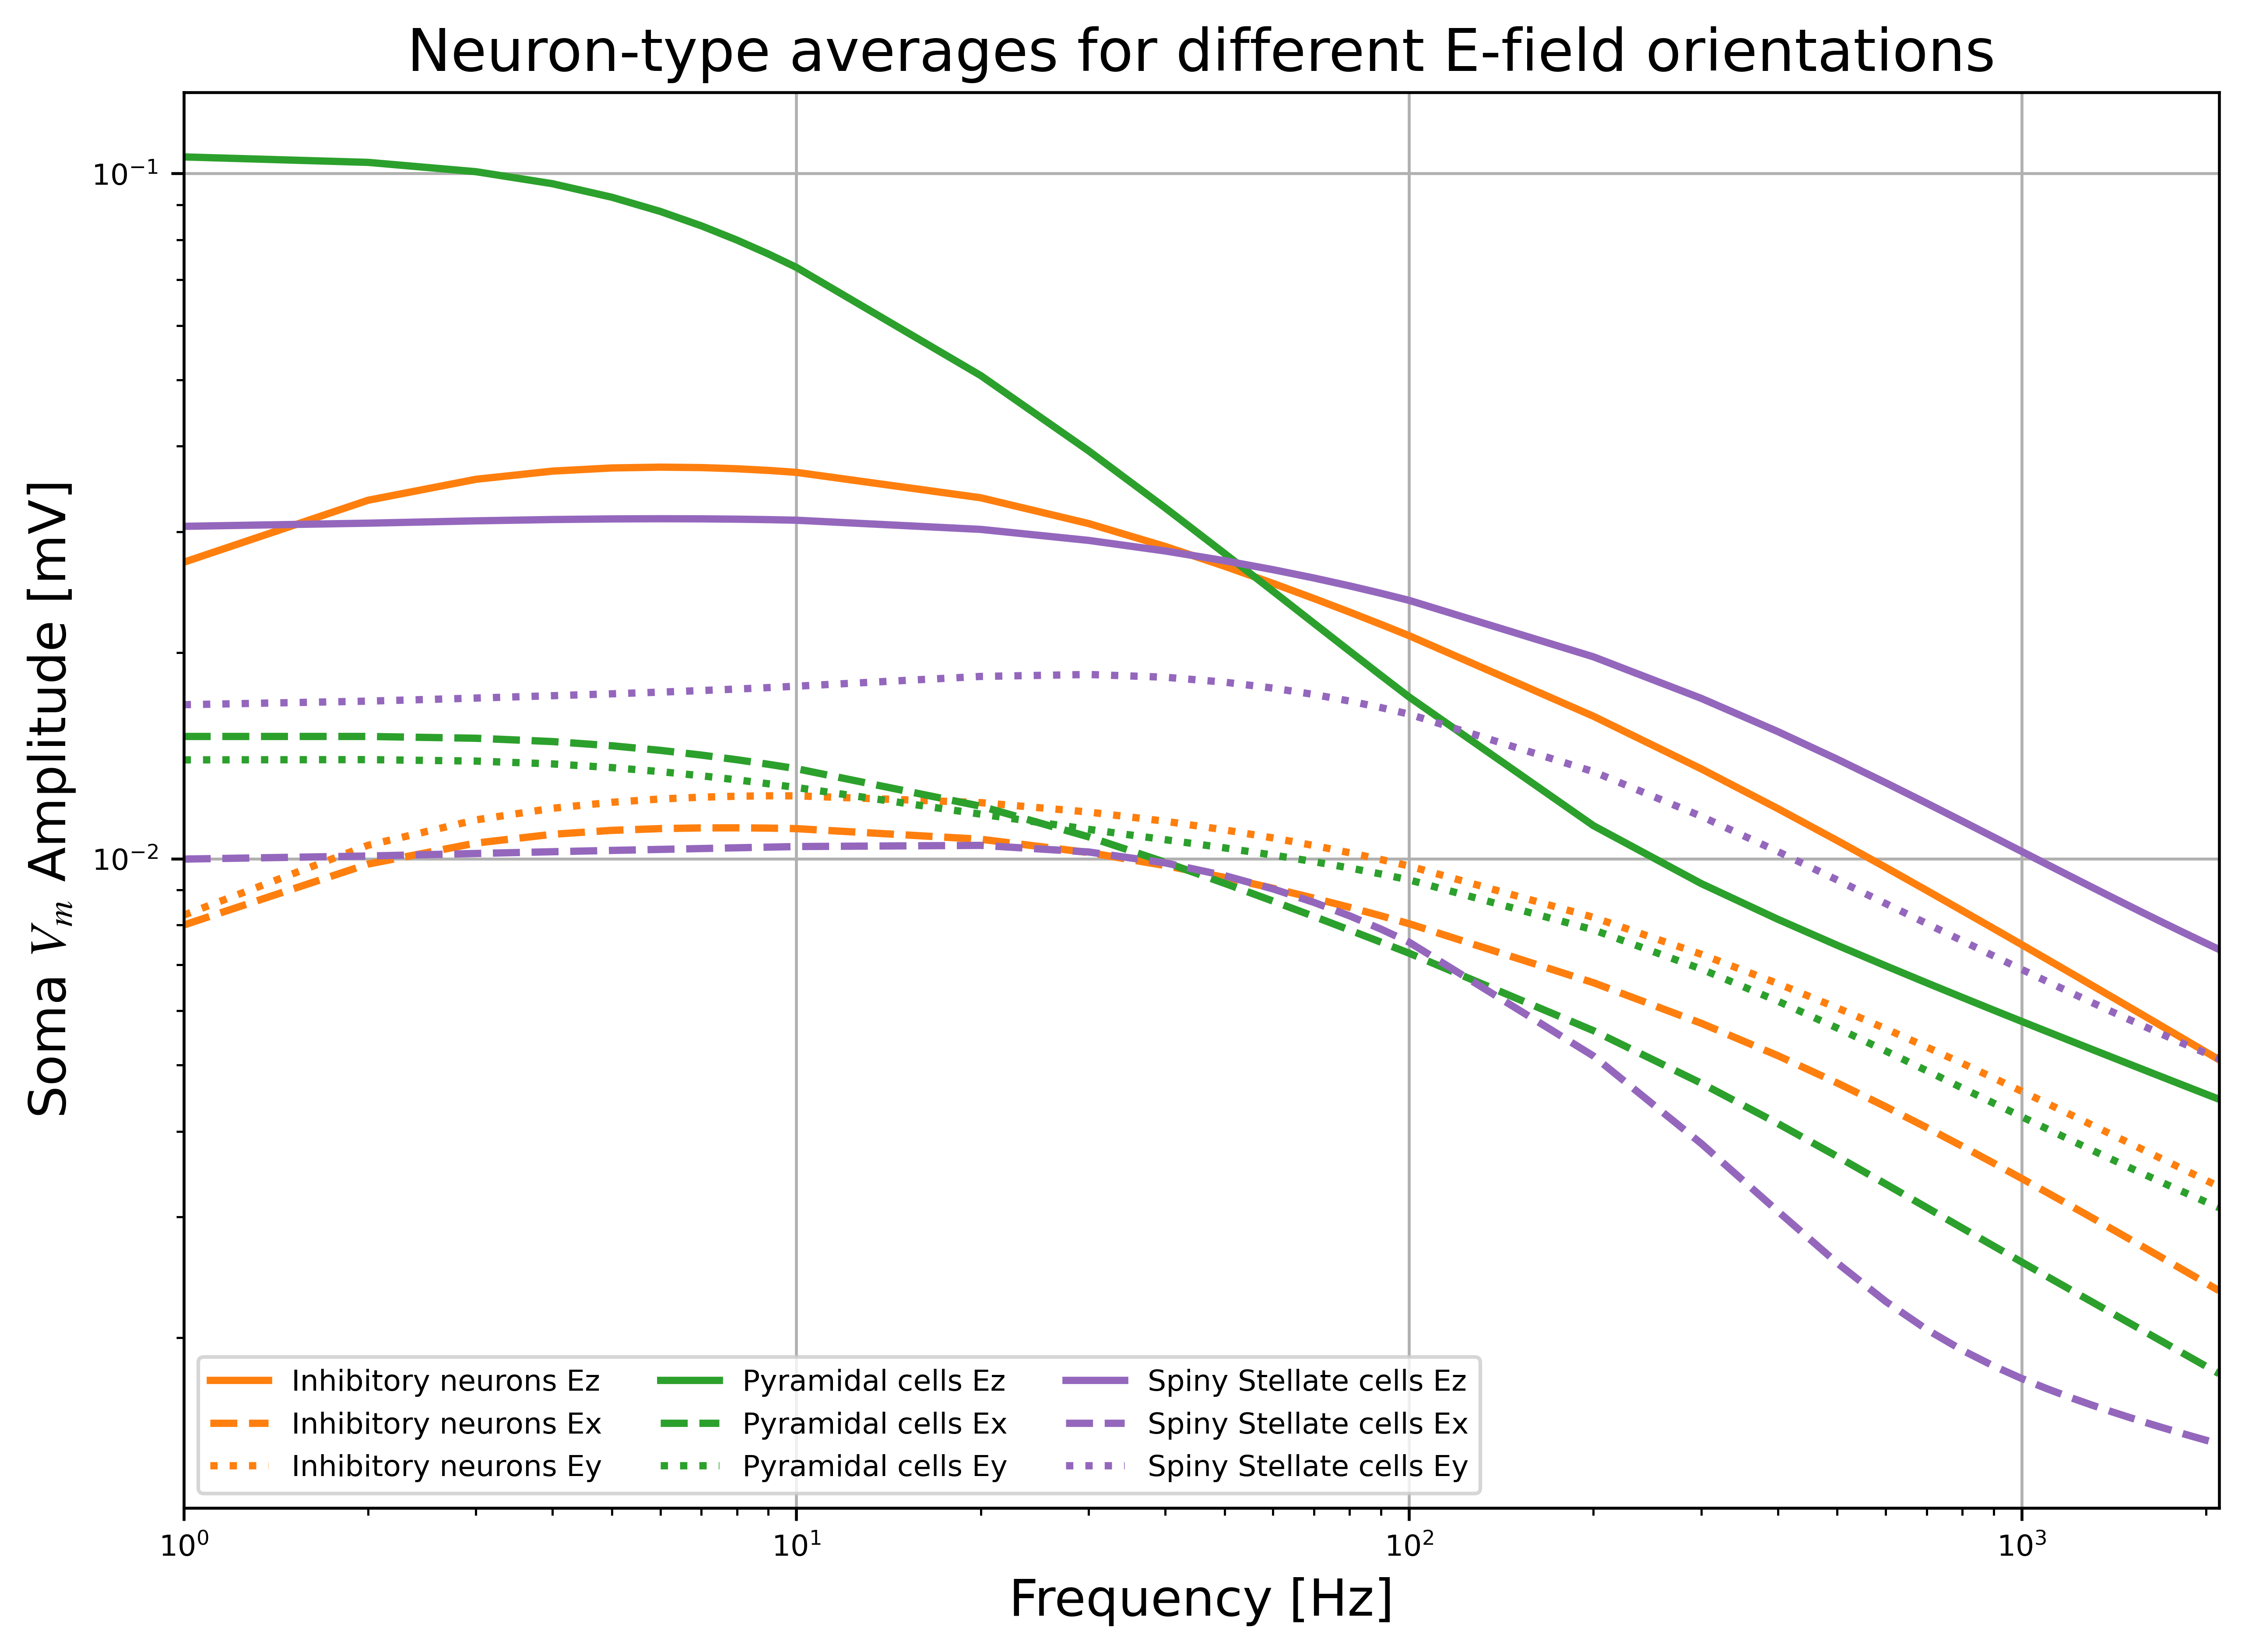

In [5]:
calculate_avg_soma_amplitude(vmem_amp_data_Ez)
calculate_avg_soma_amplitude(vmem_amp_data_Ex)
calculate_avg_soma_amplitude(vmem_amp_data_Ey)
plot_cell_type_average_different_Efields(avg_amp_data_celltype, avg_amp_data_celltype_Ex, avg_amp_data_celltype_Ey)